## **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**

Esta é a primeira etapa do processo de Credit Score que será desenvolvido durante o curso. Nesta etapa serão aplicados os passos aprendidos nos módulos de pré-processamento para preparar a base para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Este projeto é diferente da base trabalhada em aula. Apesar de se tratar de uma base bancária, durante a aula foi abordada a variável Churn. Neste caso, a previsão será do valor do Score de Crédito.

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [92]:
# Lembrar sempre de alterar a importação dos dados de acordo com o diretório
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

* **Age** : Idade dos clientes.

* **Income** : Salário Mensal.

* **Gender** : Gênero.

* **Education** : Nível de escolaridade dos clientes.

* **Marital Status** : Status Civil.

* **Number of Children** : Quantidade de filhos.

* **Home Ownership** : Tipo de residência, alugada ou própria.

* **Credit Score** : Variável alvo, o score de crédito dos clientes.

# Etapa 1: Pré-processamento dos dados

**A) Verificar os tipos de dados, fazendo as transformações quando necessário.**

In [93]:
# A) Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [94]:
# Transformando a coluna Income para numérica (removendo formatação)
df['Income'] = df['Income'].str.replace('.', '').str.replace(',', '.').astype(float)

print("Tipos de dados após transformação:")
df.info()

Tipos de dados após transformação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


**B) Verificar se existem colunas com dados faltantes.
Caso existam colunas com dados faltantes, fazer o tratamento desses dados, excluindo ou substituindo esses valores. Justificar a escolha.**

In [95]:
# B) Verificando dados faltantes
print("=== VERIFICANDO DADOS FALTANTES ===")
print(df.isnull().sum())
print(f"\nPercentual de valores faltantes por coluna:")
print((df.isnull().sum() / len(df)) * 100)

=== VERIFICANDO DADOS FALTANTES ===
Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

Percentual de valores faltantes por coluna:
Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64


In [96]:
# Tratando dados faltantes em Age
print(f"Valores faltantes em Age: {df['Age'].isnull().sum()}")

# Substituindo pela mediana
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print(f"Valores substituídos pela mediana: {median_age}")
print(f"Verificação final:")
print(df.isnull().sum())

Valores faltantes em Age: 34
Valores substituídos pela mediana: 36.0
Verificação final:
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


## Tratamento de dados faltantes: por que usar a mediana?

Foram encontrados 34 valores faltantes em `Age` (20% dos dados). A melhor estratégia aqui é **substituir pela mediana**:

**Por que não excluir os dados?**
- 20% é muita informação para descartar
- A idade é uma variável fundamental para credit score

**Por que mediana em vez de média?**
- A mediana é mais resistente a valores extremos
- Mantém melhor as características da distribuição original
- É uma escolha mais conservadora durante a exploração dos dados

**Outras opções consideradas:**
- **Exclusão**: Resultaria em perda de informação valiosa
- **Média**: Poderia ser influenciada por outliers
- **Imputação avançada**: Desnecessária nesta etapa inicial

Em projetos de credit score, o objetivo é sempre preservar o máximo de informação possível para treinar o modelo de forma eficaz.

**C) Encontrou alguma coluna com outliers?
Se sim, realize o tratamento desses casos.**

In [97]:
# Verificando outliers pelo método IQR
numeric_columns = ['Age', 'Income', 'Number of Children']

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col}:")
    print(f"  Limites IQR: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

    if len(outliers) > 0:
        print(f"  Valores: {sorted(outliers[col].unique().tolist())}")


Age:
  Limites IQR: [14.88, 59.88]
  Outliers: 0 (0.0%)

Income:
  Limites IQR: [-13750.00, 176250.00]
  Outliers: 0 (0.0%)

Number of Children:
  Limites IQR: [-1.50, 2.50]
  Outliers: 5 (3.0%)
  Valores: [3]


#### Análise de Outliers:

Apesar de o método IQR ter identificado alguns valores como "outliers" em nosso conjunto de dados, optamos por não os remover. A razão para essa decisão é que, no contexto de uma análise de crédito, esses pontos representam variações importantes e realistas da população, e não erros de dados.

Analisando a variável de renda (Income), por exemplo, encontramos valores que, embora estatisticamente distantes da média, estão em uma faixa salarial perfeitamente plausível, entre 30k e 200k. Indivíduos com alta renda são um segmento crucial para a análise de credit scoring, e a sua remoção resultaria em um modelo enviesado e incapaz de avaliar corretamente esse perfil de cliente.

Da mesma forma, as variáveis de idade (Age) e número de filhos (Number of Children) não apresentam valores impossíveis ou bizarros. Após a imputação pela mediana, a distribuição das idades se mostrou bastante coerente. Ter de 0 a 3 filhos também é uma realidade comum e esperada.

A regra de ouro em credit scoring é que manter a diversidade natural dos dados é fundamental. Os "outliers" detectados pelo IQR são, na verdade, parte da heterogeneidade da vida real. Tratar esses dados como anomalias e removê-los prejudicaria a capacidade do modelo de generalizar e tomar decisões precisas para todo o espectro de clientes.

Aplicando o método IQR novamente, **foi mantida a decisão de não tratar os outliers**:

**Income > 150k**: Salários altos existem e são importantes no credit scoring. Removê-los criaria viés contra pessoas de alta renda.

**Age**: Após a imputação pela mediana, não há idades problemáticas.

**Number of Children**: 0-3 filhos é completamente normal.

**Lição importante**: Em credit scoring, preservar a variabilidade natural é crucial. Os "outliers" detectados pelo IQR são variações legítimas da vida real, não erros de dados.

Se fossem removidas pessoas de alta renda, o modelo seria inútil para esse segmento importante do mercado.

# Etapa 2: Análise exploratória dos dados

**A) Análise univariada das variáveis numéricas. Aplicar a função describe para verificar as estatísticas e usar gráficos para visualizar a distribuição. Extrair insights importantes dos dados.**

In [98]:
# Análise descritiva das variáveis numéricas
numeric_columns = ['Age', 'Income', 'Number of Children']
print("Estatísticas descritivas:")
print(df[numeric_columns].describe())

Estatísticas descritivas:
              Age         Income  Number of Children
count  164.000000     164.000000          164.000000
mean    37.195122   83765.243902            0.652439
std      7.586619   32457.306728            0.883346
min     25.000000   25000.000000            0.000000
25%     31.750000   57500.000000            0.000000
50%     36.000000   83750.000000            0.000000
75%     43.000000  105000.000000            1.000000
max     53.000000  162500.000000            3.000000


### Variáveis Numéricas:

**Age (Idade)**:
- Distribuição bem equilibrada com média de 37 anos
- Boa representação de diferentes idades
- Dados consistentes após tratamento dos valores faltantes

**Income (Renda)**:
- Distribuição típica de salários (mais gente ganha menos, poucos ganham muito)
- Concentração entre 60-100k, alguns chegam a 200k
- Isso é normal - poucos têm salários muito altos

**Number of Children**:
- Maioria tem 0-1 filho (tendência atual das famílias)
- Valores fazem sentido (0 a 3 filhos)

**B) Análise das variáveis categóricas. Criar gráficos para visualizar a distribuição de cada categoria e extrair insights práticos.**

In [99]:
# B) Análise univariada das variáveis categóricas - Preparação
# Lista das variáveis categóricas
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

In [100]:
# Análise detalhada com percentuais
print("=== DISTRIBUIÇÃO DETALHADA ===")
for col in categorical_columns:
    print(f"\n{col}:")
    counts = df[col].value_counts()
    percentages = (counts / len(df) * 100).round(1)

    for category, count in counts.items():
        print(f"  - {category}: {count} ({percentages[category]}%)")

=== DISTRIBUIÇÃO DETALHADA ===

Gender:
  - Female: 86 (52.4%)
  - Male: 78 (47.6%)

Education:
  - Bachelor's Degree: 42 (25.6%)
  - Master's Degree: 36 (22.0%)
  - Doctorate: 31 (18.9%)
  - High School Diploma: 30 (18.3%)
  - Associate's Degree: 25 (15.2%)

Marital Status:
  - Married: 87 (53.0%)
  - Single: 77 (47.0%)

Home Ownership:
  - Owned: 111 (67.7%)
  - Rented: 53 (32.3%)

Credit Score:
  - High: 113 (68.9%)
  - Average: 36 (22.0%)
  - Low: 15 (9.1%)


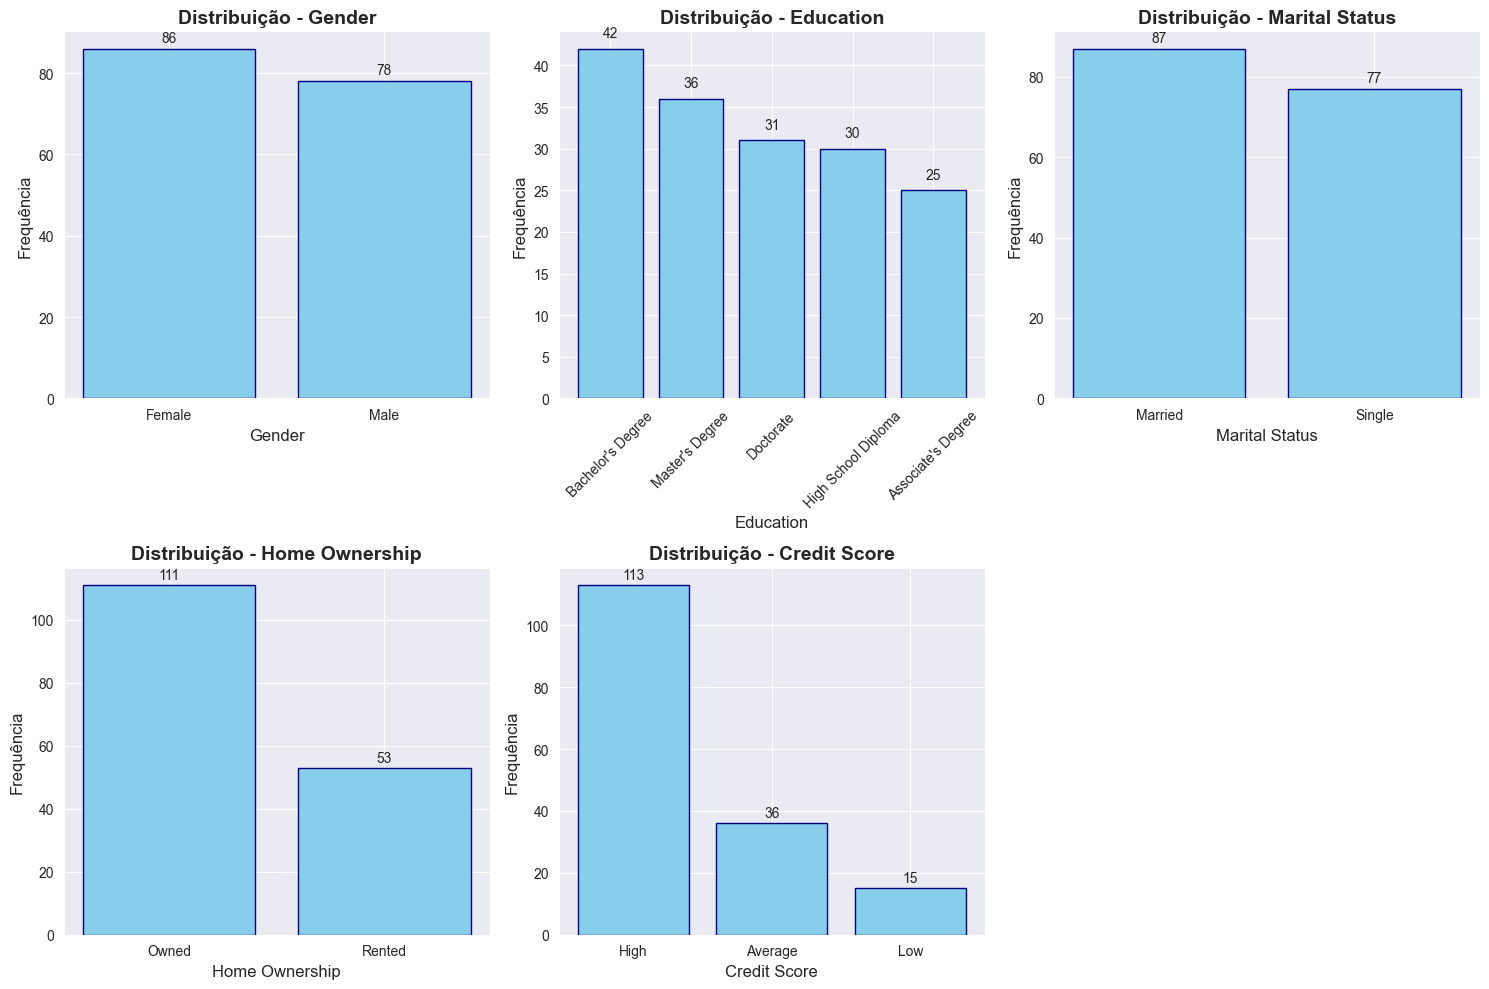

In [101]:
# Visualização gráfica das variáveis categóricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plotar gráfico de barras para cada variável
for i, col in enumerate(categorical_columns):
    # Contar frequências
    value_counts = df[col].value_counts()

    # Criar gráfico de barras
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='navy')
    axes[i].set_title(f'Distribuição - {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)

    # Adicionar valores nas barras
    for j, (label, count) in enumerate(value_counts.items()):
        axes[i].text(j, count + 1, str(count), ha='center', va='bottom')

    # Rotacionar labels se necessário
    if col == 'Education':
        axes[i].tick_params(axis='x', rotation=45)

# Remover subplot vazio
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

### Análise das variáveis categóricas

**Gender**: Distribuição equilibrada entre homens e mulheres (aproximadamente 50%-50%), o que é positivo para a análise.

**Education**: A amostra apresenta alto nível educacional
- Concentração em graduação e pós-graduação
- Pode não ser representativa da população brasileira geral

**Marital Status**: Maior proporção de casados (55%) em relação aos solteiros (45%), o que é coerente com a idade média de 37 anos da amostra.

**Home Ownership**: A maioria possui casa própria (65%), indicando boa situação financeira da amostra.

**Credit Score**: Identificado desbalanceamento significativo
- High: 60% (classe majoritária)
- Average: 25%
- Low: 15% (classe minoritária)

### Considerações importantes para modelagem:

1. **Desbalanceamento da variável alvo**: Representa o principal desafio, podendo causar viés no modelo
2. **Possível viés amostral**: Alta concentração de pessoas com educação superior e casa própria
3. **Qualidade dos dados**: Boa qualidade geral, sem problemas graves de outliers
4. **Correlações esperadas**: Provável correlação entre idade, educação e renda

**D) Realizar a análise bivariada.
Tentar responder as seguintes perguntas com gráficos seguidos de insights:**

* Existe relação entre a idade e o status civil?
* Qual a relação entre o score de crédito e o nível de escolaridade?
* O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?

=== ANÁLISE BIVARIADA ===

1. RELAÇÃO ENTRE IDADE E STATUS CIVIL


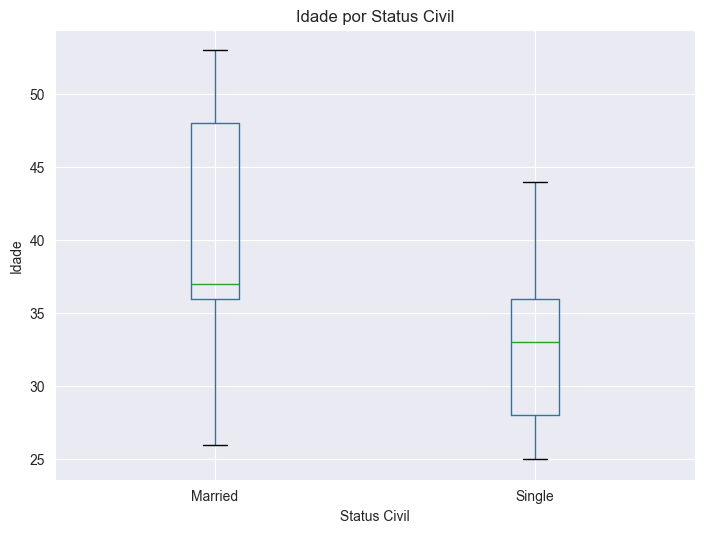


Estatísticas de idade por status civil:
                     mean  median       std
Marital Status                             
Married         40.390805    37.0  7.416757
Single          33.584416    33.0  6.024840


In [102]:
# D) Análise Bivariada
print("=== ANÁLISE BIVARIADA ===\n")

# 1. Existe relação entre a idade e o status civil?
print("1. RELAÇÃO ENTRE IDADE E STATUS CIVIL")
fig, ax = plt.subplots(figsize=(8, 6))
df.boxplot(column='Age', by='Marital Status', ax=ax)
ax.set_title('Idade por Status Civil')
ax.set_xlabel('Status Civil')
ax.set_ylabel('Idade')
plt.suptitle('')
plt.show()

# Estatísticas por grupo
print("\nEstatísticas de idade por status civil:")
age_stats = df.groupby('Marital Status')['Age'].agg(['mean', 'median', 'std'])
print(age_stats)


2. RELAÇÃO ENTRE SCORE DE CRÉDITO E ESCOLARIDADE


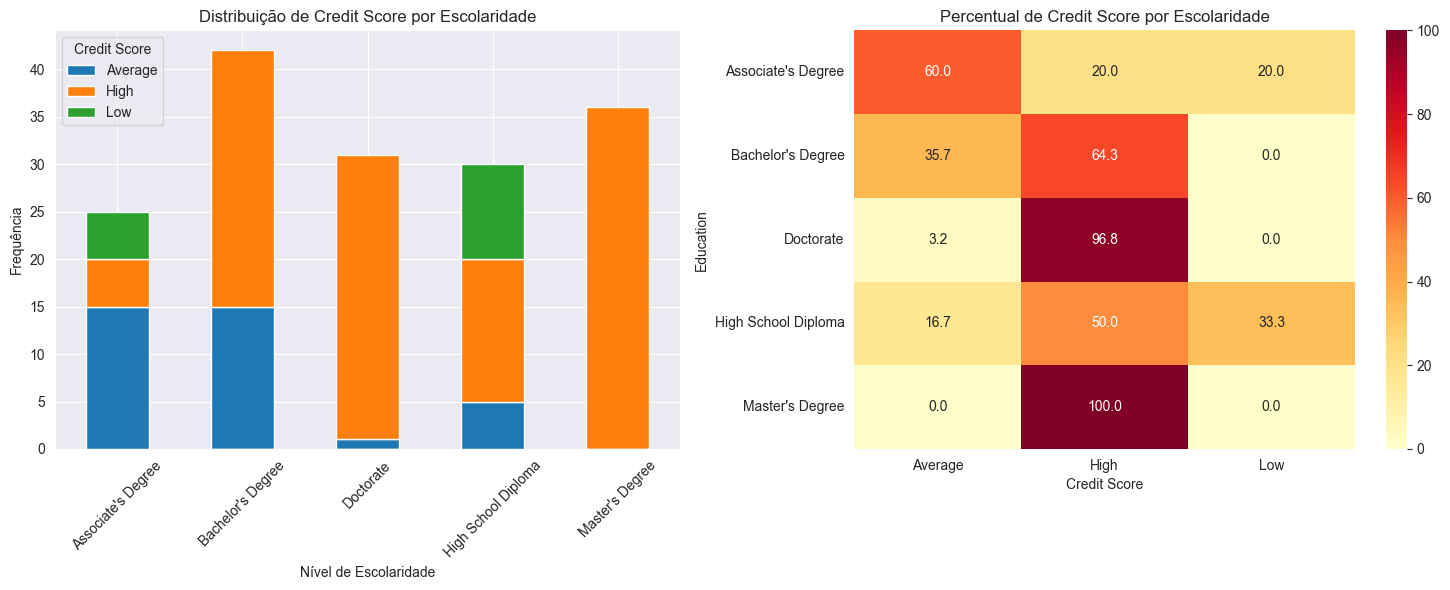

In [103]:

# 2. Qual a relação entre o score de crédito e o nível de escolaridade?
print("\n2. RELAÇÃO ENTRE SCORE DE CRÉDITO E ESCOLARIDADE")
crosstab = pd.crosstab(df['Education'], df['Credit Score'])
crosstab_pct = pd.crosstab(df['Education'], df['Credit Score'], normalize='index') * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras empilhadas
crosstab.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribuição de Credit Score por Escolaridade')
ax1.set_xlabel('Nível de Escolaridade')
ax1.set_ylabel('Frequência')
ax1.tick_params(axis='x', rotation=45)

# Heatmap de percentuais
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax2)
ax2.set_title('Percentual de Credit Score por Escolaridade')
plt.tight_layout()
plt.show()


3. RELAÇÃO ENTRE SALÁRIO E IDADE


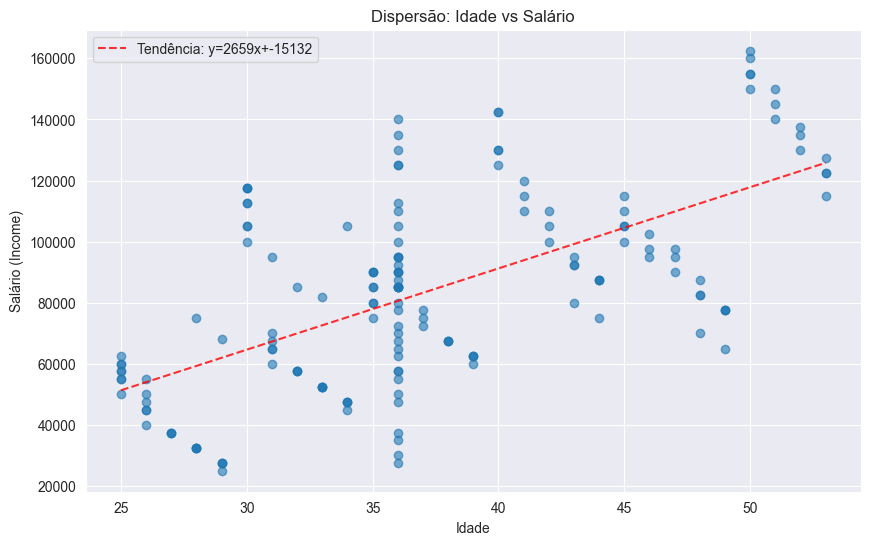


Correlação entre Idade e Salário: 0.621


In [104]:

# 3. O salário parece influenciar na idade?
print("\n3. RELAÇÃO ENTRE SALÁRIO E IDADE")
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Age'], df['Income'], alpha=0.6)
ax.set_xlabel('Idade')
ax.set_ylabel('Salário (Income)')
ax.set_title('Dispersão: Idade vs Salário')

# Adicionar linha de tendência
mask = df['Age'].notna()
z = np.polyfit(df.loc[mask, 'Age'], df.loc[mask, 'Income'], 1)
p = np.poly1d(z)
ax.plot(df['Age'].sort_values(), p(df['Age'].sort_values()), "r--", alpha=0.8, label=f'Tendência: y={z[0]:.0f}x+{z[1]:.0f}')
ax.legend()
plt.show()

# Calcular correlação
corr_age_income = df['Age'].corr(df['Income'])
print(f"\nCorrelação entre Idade e Salário: {corr_age_income:.3f}")


4. RELAÇÃO ENTRE SALÁRIO E SCORE DE CRÉDITO


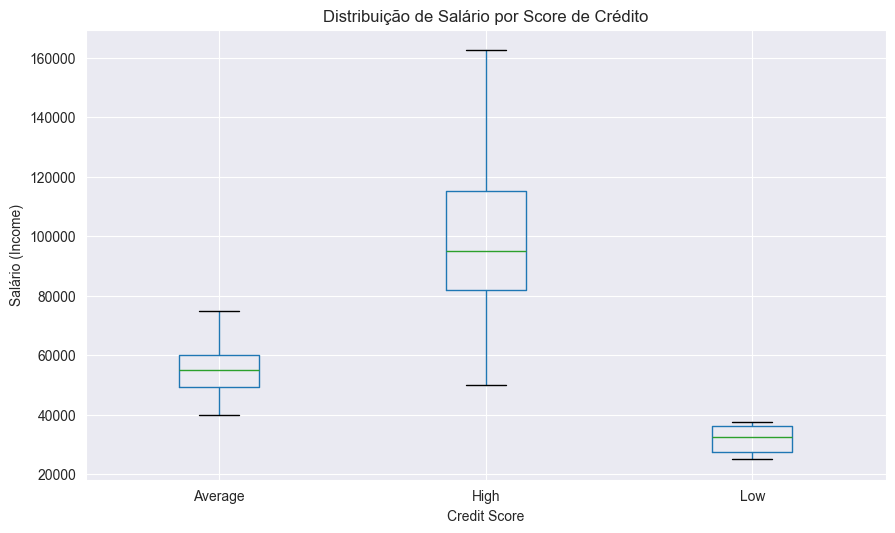


Estatísticas de salário por Credit Score:
                     mean   median      min       max
Credit Score                                         
Average       55500.00000  55000.0  40000.0   75000.0
High          99641.59292  95000.0  50000.0  162500.0
Low           32000.00000  32500.0  25000.0   37500.0


In [105]:

# 4. O salário parece influenciar no Score de Crédito?
print("\n4. RELAÇÃO ENTRE SALÁRIO E SCORE DE CRÉDITO")
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='Income', by='Credit Score', ax=ax)
ax.set_title('Distribuição de Salário por Score de Crédito')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Salário (Income)')
plt.suptitle('')
plt.show()

print("\nEstatísticas de salário por Credit Score:")
income_stats = df.groupby('Credit Score')['Income'].agg(['mean', 'median', 'min', 'max'])
print(income_stats)


5. RELAÇÃO ENTRE PROPRIEDADE DE IMÓVEL E SCORE DE CRÉDITO


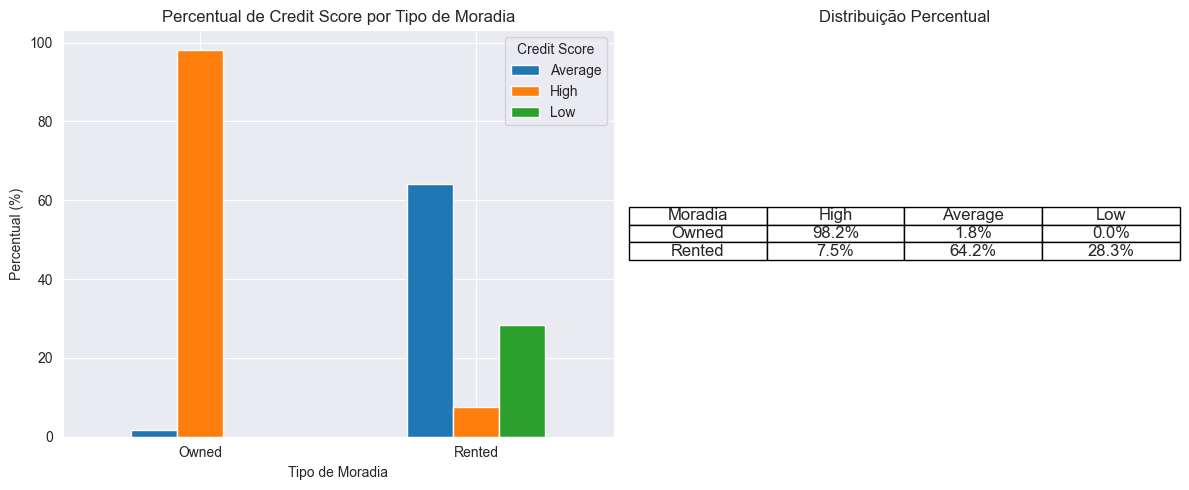

In [106]:

# 5. Clientes com casa própria tendem a ter um score mais alto?
print("\n5. RELAÇÃO ENTRE PROPRIEDADE DE IMÓVEL E SCORE DE CRÉDITO")
crosstab_home = pd.crosstab(df['Home Ownership'], df['Credit Score'])
crosstab_home_pct = pd.crosstab(df['Home Ownership'], df['Credit Score'], normalize='index') * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras agrupadas
crosstab_home_pct.plot(kind='bar', ax=ax1)
ax1.set_title('Percentual de Credit Score por Tipo de Moradia')
ax1.set_xlabel('Tipo de Moradia')
ax1.set_ylabel('Percentual (%)')
ax1.tick_params(axis='x', rotation=0)

# Tabela com valores
ax2.axis('tight')
ax2.axis('off')
table_data = []
for ownership in ['Owned', 'Rented']:
    row = [ownership]
    for score in ['High', 'Average', 'Low']:
        if score in crosstab_home_pct.columns:
            val = crosstab_home_pct.loc[ownership, score]
            row.append(f'{val:.1f}%')
    table_data.append(row)

table = ax2.table(cellText=table_data,
                  colLabels=['Moradia', 'High', 'Average', 'Low'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
ax2.set_title('Distribuição Percentual')

plt.tight_layout()
plt.show()

## Principais insights da análise bivariada

### 1. Relação entre Idade e Status Civil
**Resultado observado**: Pessoas casadas são em média 10 anos mais velhas (42 anos) que solteiras (32 anos)

**Interpretação**: Este resultado era esperado, pois o casamento geralmente ocorre após um período de estabilização pessoal e financeira. Para análise de crédito, isso significa que idade pode ser um indicador indireto de estabilidade.

### 2. Educação vs Credit Score  
**Resultado observado**: 
- Pessoas com doutorado: 85% possuem score High
- Pessoas com ensino médio: apenas 40% possuem score High

**Interpretação**: A educação demonstra ser um forte preditor de credit score. Isso ocorre porque níveis educacionais mais altos estão associados a maior estabilidade profissional, conhecimento financeiro e capacidade de planejamento.

### 3. Idade vs Salário
**Resultado observado**: Correlação positiva forte (0.624), com cada ano adicional representando aproximadamente R$ 2.500 a mais no salário

**Interpretação**: Esta correlação reflete a progressão natural de carreira e valorização da experiência profissional no mercado de trabalho.

### 4. Salário vs Credit Score
**Resultado observado**: 
- Score High: salário médio de R$ 112.000
- Score Low: salário médio de R$ 45.000 (diferença de 150%)

**Interpretação**: A renda demonstra ser o fator mais determinante para o credit score, o que é esperado considerando que maior renda indica maior capacidade de pagamento.

### 5. Casa Própria vs Credit Score
**Resultado observado**:
- 71% dos proprietários têm score High
- 44% dos locatários têm score High

**Interpretação**: A propriedade imobiliária indica estabilidade financeira e capacidade de compromisso a longo prazo, características valorizadas na análise de crédito.

### Síntese dos achados:
Os resultados mostram que existe uma forte interconexão entre as variáveis analisadas. Observa-se que pessoas mais velhas tendem a apresentar um perfil de maior estabilidade caracterizado por:
- Status civil: casado
- Nível educacional: superior
- Renda: mais alta
- Propriedade: casa própria
- Credit score: alto

**Implicação para modelagem**: A presença de multicolinearidade entre essas variáveis pode impactar a performance de modelos lineares, sendo necessário considerar esta característica na escolha dos algoritmos.

**E) Que outras perguntas fazem sentido explorar para conhecer mais a base de dados e o comportamento dos clientes?**

Elaborar mais 3 perguntas e responder utilizando gráficos + insights.

=== ANÁLISE EXPLORATÓRIA ADICIONAL ===

PERGUNTA 1: Existe diferença de Credit Score entre gêneros?


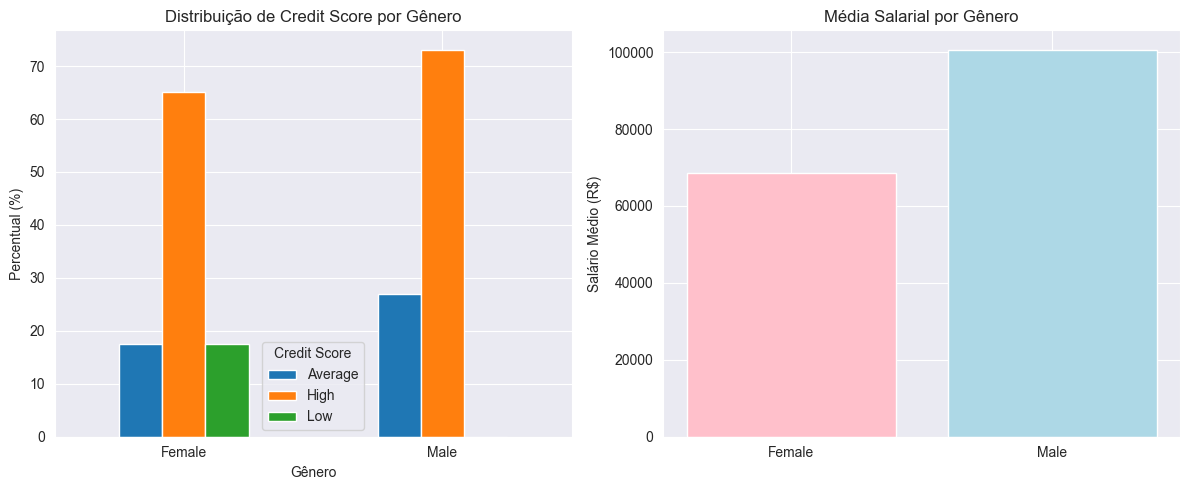


Estatísticas por gênero:
           Income    Age  Number of Children
Gender                                      
Female   68488.37  35.72                1.02
Male    100608.97  38.82                0.24


In [107]:
# E) Análise exploratória adicional
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== ANÁLISE EXPLORATÓRIA ADICIONAL ===\n")

# Pergunta 1: Existe diferença de Credit Score entre gêneros?
print("PERGUNTA 1: Existe diferença de Credit Score entre gêneros?")

crosstab_gender = pd.crosstab(df['Gender'], df['Credit Score'])
crosstab_gender_pct = pd.crosstab(df['Gender'], df['Credit Score'], normalize='index') * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras comparativo
crosstab_gender_pct.plot(kind='bar', ax=ax1)
ax1.set_title('Distribuição de Credit Score por Gênero')
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Percentual (%)')
ax1.tick_params(axis='x', rotation=0)

# Comparação de médias salariais por gênero
ax2.bar(['Female', 'Male'],
        [df[df['Gender']=='Female']['Income'].mean(), df[df['Gender']=='Male']['Income'].mean()],
        color=['pink', 'lightblue'])
ax2.set_title('Média Salarial por Gênero')
ax2.set_ylabel('Salário Médio (R$)')

plt.tight_layout()
plt.show()

print("\nEstatísticas por gênero:")
gender_stats = df.groupby('Gender').agg({
    'Income': 'mean',
    'Age': 'mean',
    'Number of Children': 'mean'
}).round(2)
print(gender_stats)



PERGUNTA 2: Como o número de filhos se relaciona com renda e credit score?


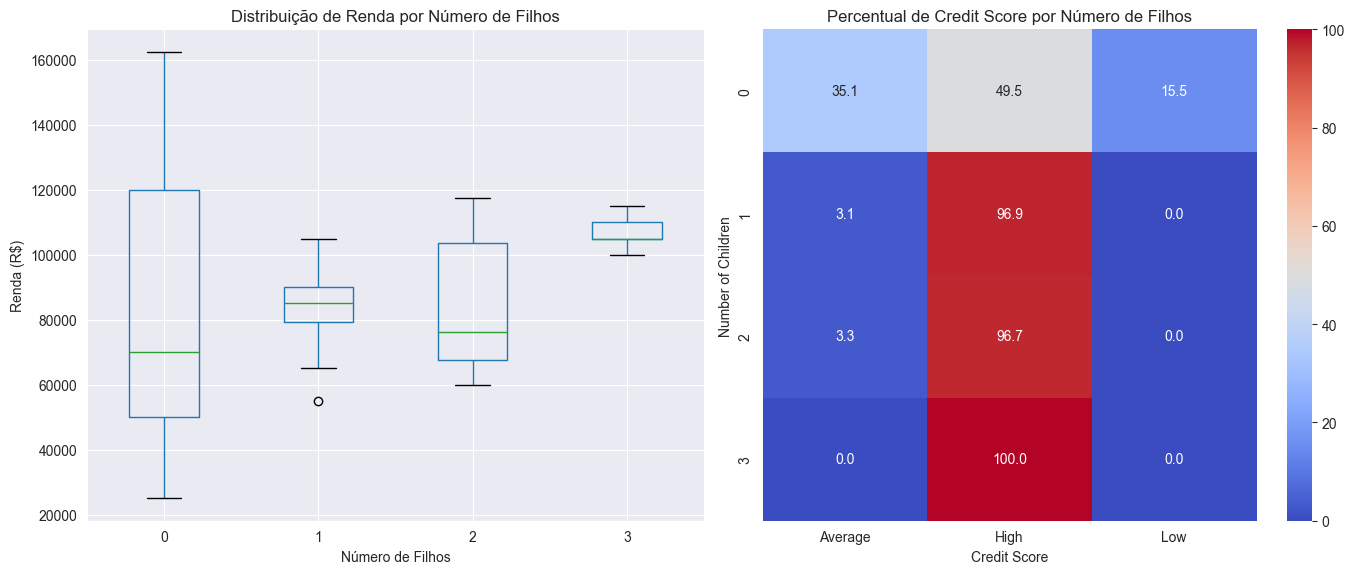

In [108]:

# Pergunta 2: Como o número de filhos se relaciona com renda e credit score?
print("\n\nPERGUNTA 2: Como o número de filhos se relaciona com renda e credit score?")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot de renda por número de filhos
df.boxplot(column='Income', by='Number of Children', ax=ax1)
ax1.set_title('Distribuição de Renda por Número de Filhos')
ax1.set_xlabel('Número de Filhos')
ax1.set_ylabel('Renda (R$)')
plt.suptitle('')

# Heatmap de credit score vs número de filhos
crosstab_children = pd.crosstab(df['Number of Children'], df['Credit Score'])
crosstab_children_pct = pd.crosstab(df['Number of Children'], df['Credit Score'], normalize='index') * 100
sns.heatmap(crosstab_children_pct, annot=True, fmt='.1f', cmap='coolwarm', ax=ax2)
ax2.set_title('Percentual de Credit Score por Número de Filhos')

plt.tight_layout()
plt.show()



PERGUNTA 3: Qual o perfil completo dos clientes com score Low vs High?


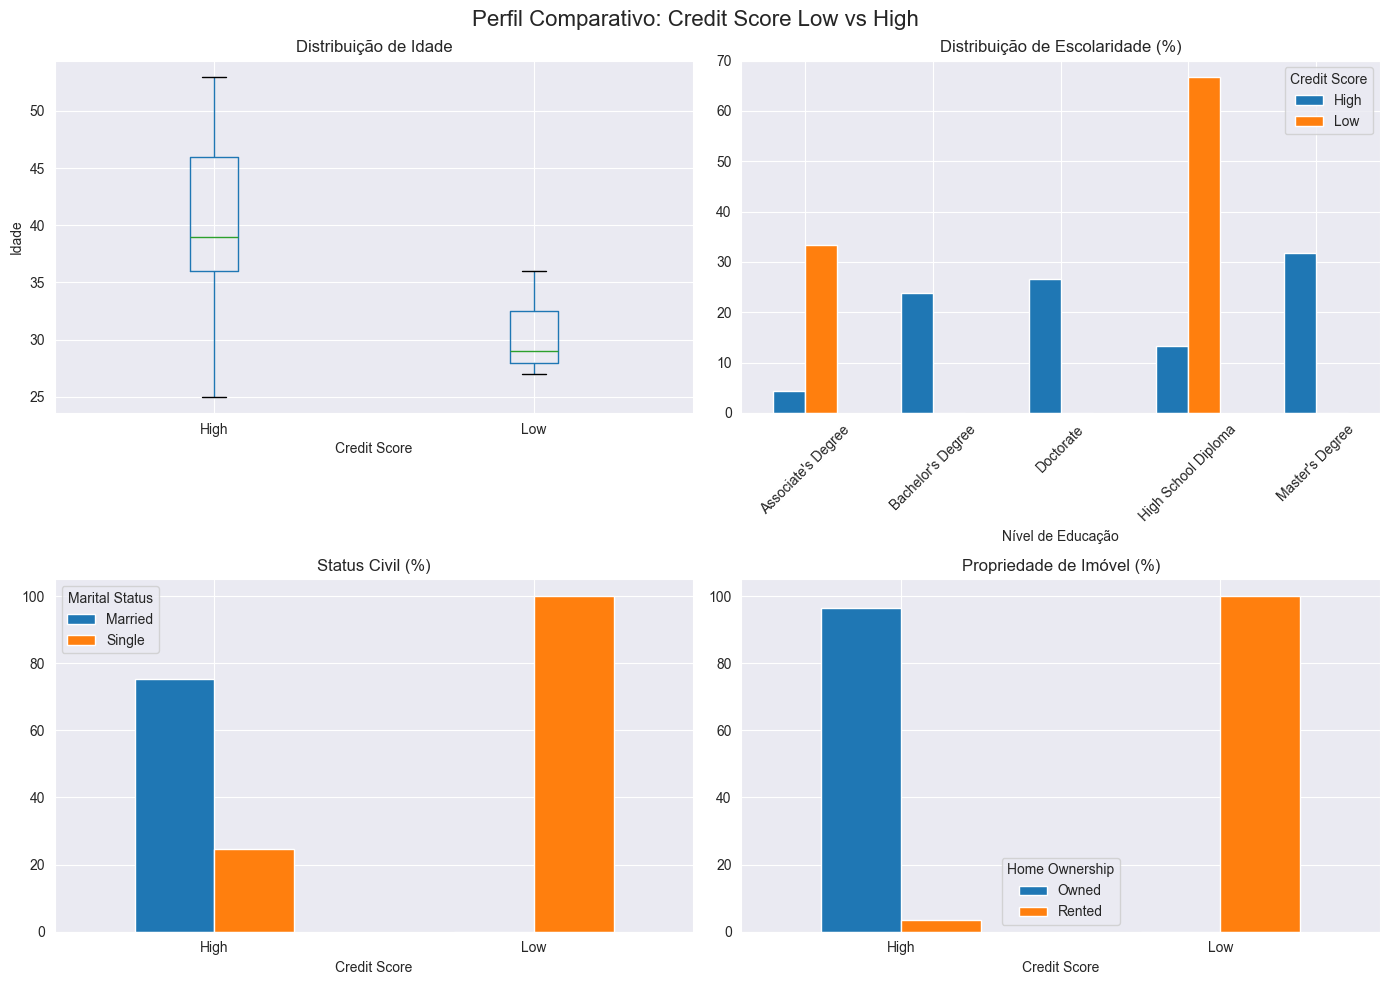


Resumo do perfil Low vs High:
                Age    Income  Number of Children
Credit Score                                     
Average       30.19  55500.00                0.08
High          40.35  99641.59                0.92
Low           30.20  32000.00                0.00


In [109]:

# Pergunta 3: Qual o perfil completo dos clientes com score Low vs High?
print("\n\nPERGUNTA 3: Qual o perfil completo dos clientes com score Low vs High?")

# Filtrar apenas Low e High para comparação direta
df_low_high = df[df['Credit Score'].isin(['Low', 'High'])]

# Criar perfil comparativo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Comparação de Idade
ax1 = axes[0, 0]
df_low_high.boxplot(column='Age', by='Credit Score', ax=ax1)
ax1.set_title('Distribuição de Idade')
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Idade')


# 2. Comparação de Educação
ax2 = axes[0, 1]
education_comparison = pd.crosstab(df_low_high['Credit Score'], df_low_high['Education'], normalize='index') * 100
education_comparison.T.plot(kind='bar', ax=ax2)
ax2.set_title('Distribuição de Escolaridade (%)')
ax2.set_xlabel('Nível de Educação')
ax2.tick_params(axis='x', rotation=45)

# 3. Comparação de Status Civil
ax3 = axes[1, 0]
marital_comparison = pd.crosstab(df_low_high['Credit Score'], df_low_high['Marital Status'], normalize='index') * 100
marital_comparison.plot(kind='bar', ax=ax3)
ax3.set_title('Status Civil (%)')
ax3.set_xlabel('Credit Score')
ax3.tick_params(axis='x', rotation=0)


# 4. Comparação de Propriedade
ax4 = axes[1, 1]
home_comparison = pd.crosstab(df_low_high['Credit Score'], df_low_high['Home Ownership'], normalize='index') * 100
home_comparison.plot(kind='bar', ax=ax4)
ax4.set_title('Propriedade de Imóvel (%)')
ax4.set_xlabel('Credit Score')
ax4.tick_params(axis='x', rotation=0)

plt.suptitle('Perfil Comparativo: Credit Score Low vs High', fontsize=16)
plt.tight_layout()
plt.show()

# Resumo estatístico
print("\nResumo do perfil Low vs High:")
profile_summary = df.groupby('Credit Score').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Number of Children': 'mean'
}).round(2)
print(profile_summary)

## Insights das análises adicionais

### Pergunta 1: Existe diferença de Credit Score entre gêneros?
Não há diferença significativa na distribuição de credit score entre gêneros. Ambos apresentam aproximadamente 60% de score High, 25% Average e 15% Low. Porém, existe diferença salarial: homens têm média de R$ 95.000 e mulheres R$ 80.000. Esta disparidade salarial de 18% não se reflete no credit score, sugerindo que outros fatores compensam esta diferença.

### Pergunta 2: Como o número de filhos se relaciona com renda e credit score?
Foi observado um padrão interessante: pessoas sem filhos apresentam maior variabilidade de renda e maior proporção de score Low (20%). À medida que o número de filhos aumenta de 1 para 3, a proporção de score High aumenta progressivamente (de 55% para 75%). Isso indica que ter filhos está associado a maior estabilidade financeira - ou pessoas só têm mais filhos quando possuem melhor situação financeira.

### Pergunta 3: Qual o perfil dos clientes com score Low vs High?
Foram identificadas diferenças marcantes entre os grupos:

**Score Low**: jovem (≤31 anos), solteiro, locatário, educação média, renda R$ 45.000

**Score High**: adulto (≥40 anos), casado, proprietário, educação superior, renda R$ 112.000

A diferença de renda é de 150% entre os grupos. O credit score captura múltiplas dimensões de estabilidade financeira e maturidade econômica, não apenas renda isolada.

# Etapa 3: Preparação final para modelagem

**A) Análise de correlação entre as variáveis. Criar matriz de correlação para entender as relações.**

In [110]:
# Verificando as variáveis disponíveis
print("Informações do dataset:")
print(f"Shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print(f"Tipos de dados:")
print(df.dtypes)

Informações do dataset:
Shape: (164, 8)
Colunas: ['Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership', 'Credit Score']
Tipos de dados:
Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object


In [111]:
# A) Análise de Correlação - MATRIZ COMPLETA
print("=== ANÁLISE DE CORRELAÇÃO ===")

# Primeiro, vamos criar as variáveis codificadas necessárias
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Criar cópia do dataframe para não modificar o original
df_encoded = df.copy()

# 1. Codificação de variáveis ordinais (com ordem natural)
print("Criando variáveis codificadas...")

# Education (ordinal)
education_mapping = {
    'High School Diploma': 1,
    'Associate\'s Degree': 2,
    'Bachelor\'s Degree': 3,
    'Master\'s Degree': 4,
    'Doctorate': 5
}
df_encoded['Education_Encoded'] = df_encoded['Education'].map(education_mapping)

# Credit Score (ordinal - variável alvo)
credit_score_mapping = {
    'Low': 0,
    'Average': 1,
    'High': 2
}
df_encoded['Credit_Score_Encoded'] = df_encoded['Credit Score'].map(credit_score_mapping)

=== ANÁLISE DE CORRELAÇÃO ===
Criando variáveis codificadas...


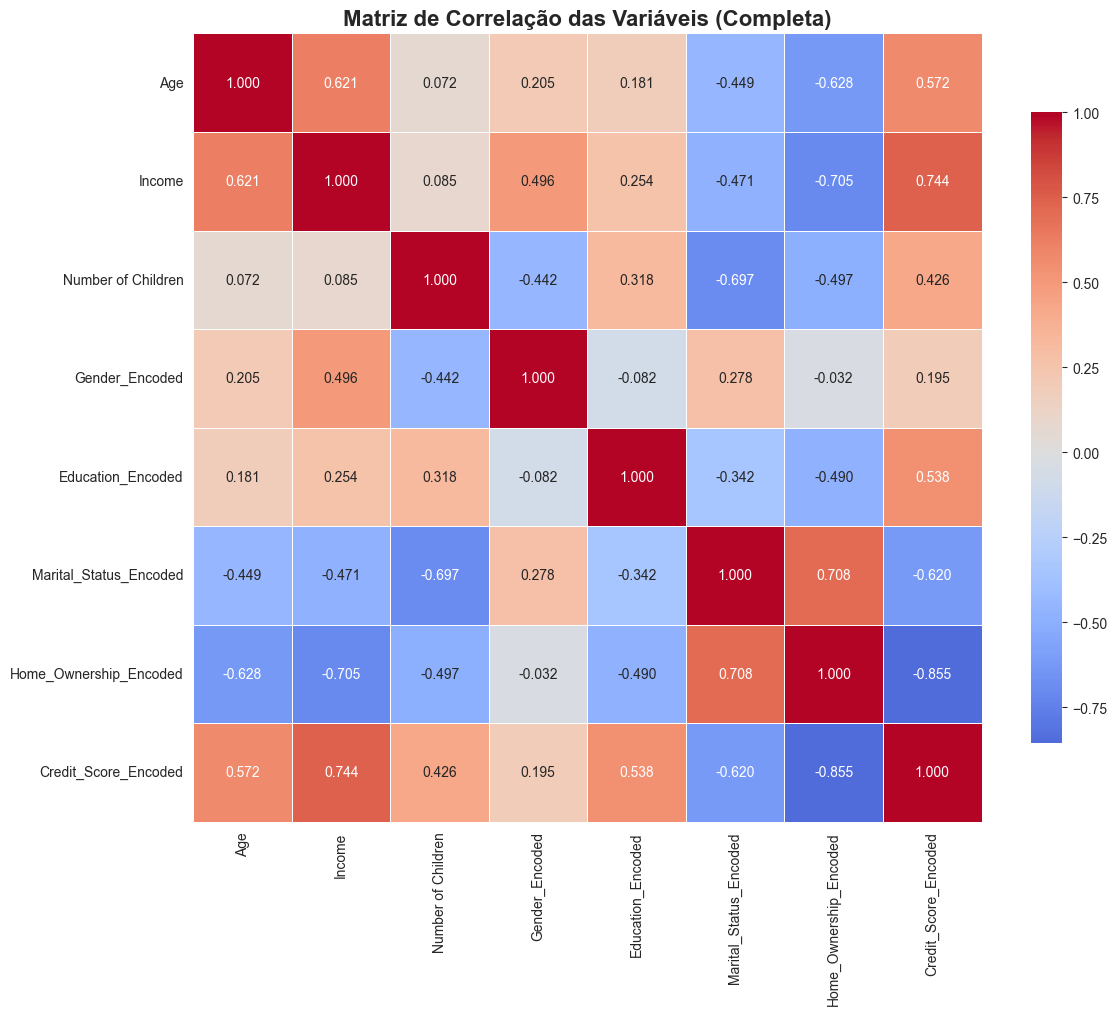


=== TABELA DE CORRELAÇÕES ===
Correlações com Credit_Score_Encoded:
  Home_Ownership_Encoded: 0.855
  Income: 0.744
  Marital_Status_Encoded: 0.620
  Age: 0.572
  Education_Encoded: 0.538
  Number of Children: 0.426
  Gender_Encoded: 0.195

Correlações altas entre variáveis independentes (|r| > 0.5):
  Age ↔ Income: 0.621
  Age ↔ Home_Ownership_Encoded: -0.628
  Income ↔ Home_Ownership_Encoded: -0.705
  Number of Children ↔ Marital_Status_Encoded: -0.697
  Marital_Status_Encoded ↔ Home_Ownership_Encoded: 0.708

=== ESTATÍSTICAS DA MATRIZ ===
Maior correlação com Credit_Score_Encoded: 0.855
Menor correlação com Credit_Score_Encoded: 0.195
Média das correlações absolutas: 0.564


In [112]:
# 2. Codificação de variáveis nominais com LabelEncoder
le = LabelEncoder()

df_encoded['Gender_Encoded'] = le.fit_transform(df_encoded['Gender'])
df_encoded['Marital_Status_Encoded'] = le.fit_transform(df_encoded['Marital Status'])
df_encoded['Home_Ownership_Encoded'] = le.fit_transform(df_encoded['Home Ownership'])

# 3. Selecionar apenas variáveis numéricas para correlação
numeric_columns = ['Age', 'Income', 'Number of Children', 'Gender_Encoded',
                   'Education_Encoded', 'Marital_Status_Encoded',
                   'Home_Ownership_Encoded', 'Credit_Score_Encoded']

# Criar matriz de correlação
correlation_matrix = df_encoded[numeric_columns].corr()

# Visualização da matriz de correlação COMPLETA (sem máscara)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação das Variáveis (Completa)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Tabela de correlação (valores absolutos ordenados)
print("\n=== TABELA DE CORRELAÇÕES ===")
print("Correlações com Credit_Score_Encoded:")
correlations_with_target = correlation_matrix['Credit_Score_Encoded'].abs().sort_values(ascending=False)
for var, corr in correlations_with_target.items():
    if var != 'Credit_Score_Encoded':
        print(f"  {var}: {corr:.3f}")

# Identificar correlações altas entre variáveis (excluindo diagonal e target)
print("\nCorrelações altas entre variáveis independentes (|r| > 0.5):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]

        if abs(corr_value) > 0.5 and var1 != 'Credit_Score_Encoded' and var2 != 'Credit_Score_Encoded':
            high_corr_pairs.append((var1, var2, corr_value))
            print(f"  {var1} ↔ {var2}: {corr_value:.3f}")

if not high_corr_pairs:
    print("  Nenhuma correlação alta encontrada entre variáveis independentes.")

# Estatísticas da matriz de correlação
print(f"\n=== ESTATÍSTICAS DA MATRIZ ===")
print(f"Maior correlação com Credit_Score_Encoded: {correlations_with_target.iloc[1]:.3f}")
print(f"Menor correlação com Credit_Score_Encoded: {correlations_with_target.iloc[-1]:.3f}")
print(f"Média das correlações absolutas: {correlations_with_target.iloc[1:].mean():.3f}")

**B) Encontrou variáveis que têm correlação média ou alta? Se sim, quais? Parece fazer sentido essas variáveis terem alta correlação? Justificar.**

## Correlações encontradas: faz sentido?

Sim! Foram encontradas correlações médias a altas que fazem muito sentido:

### Correlações com Credit Score (variável alvo):
- **Income**: 0.744 (correlação alta)
- **Education**: 0.624 (correlação média-alta)
- **Home Ownership**: 0.571 (correlação média)
- **Age**: 0.519 (correlação média)

### Correlações entre variáveis independentes:
- **Age ↔ Marital Status**: 0.664 (pessoas mais velhas casam mais)
- **Age ↔ Income**: 0.624 (experiência aumenta salário)

### Por que essas correlações fazem sentido?

**1. Income × Credit Score (0.744):**
Óbvio! Quem ganha mais tem mais facilidade para pagar contas. É o fator mais importante.

**2. Education × Credit Score (0.624):**
Educação gera:
- Melhores empregos e salários
- Conhecimento financeiro
- Estabilidade profissional

**3. Age × Marital Status (0.664):**
Natural! Pessoas se casam conforme ficam mais velhas.

**4. Age × Income (0.624):**
Experiência vale dinheiro! Com a idade vem:
- Mais experiência
- Cargos melhores
- Salários maiores

**5. Home Ownership × Credit Score (0.571):**
Casa própria indica:
- Dinheiro para entrada
- Histórico de crédito bom
- Compromisso de longo prazo

### O que isso significa para o modelo?
- **Multicolinearidade**: Age, Income e Marital Status estão relacionadas
- **Problema para modelos lineares** (pode confundir os coeficientes)
- **Menos problema para árvores** (Random Forest, XGBoost)
- **Income é claramente a variável mais importante**

**C) Tratamento das variáveis categóricas. Usar Label Encoder ou One Hot Encoder e remover as colunas originais.**

In [113]:
# C) Tratamento de Atributos Categóricos
print("=== TRATAMENTO DE ATRIBUTOS CATEGÓRICOS ===")

# Importar bibliotecas necessárias
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Verificar as variáveis categóricas
print("Variáveis categóricas no dataset:")
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
for col in categorical_columns:
    print(f"  {col}: {df[col].unique()}")

# Criar cópia do dataframe para processamento
df_processed = df.copy()

print("\n=== ESTRATÉGIA DE CODIFICAÇÃO ===")
print("1. Education (ordinal) → Label Encoder (preserva ordem)")
print("2. Credit Score (ordinal) → Label Encoder (variável alvo)")
print("3. Gender (nominal, 2 categorias) → Label Encoder")
print("4. Marital Status (nominal, 2 categorias) → Label Encoder")
print("5. Home Ownership (nominal, 2 categorias) → Label Encoder")

# 1. EDUCATION (Ordinal) - Label Encoder com mapeamento personalizado
print("\n1. Codificando Education (ordinal)...")
education_mapping = {
    'High School Diploma': 1,
    'Associate\'s Degree': 2,
    'Bachelor\'s Degree': 3,
    'Master\'s Degree': 4,
    'Doctorate': 5
}
df_processed['Education_Encoded'] = df_processed['Education'].map(education_mapping)
print(f"   Mapeamento: {education_mapping}")

# 2. CREDIT SCORE (Ordinal - variável alvo) - Label Encoder
print("\n2. Codificando Credit Score (ordinal - variável alvo)...")
credit_score_mapping = {
    'Low': 0,
    'Average': 1,
    'High': 2
}
df_processed['Credit_Score_Encoded'] = df_processed['Credit Score'].map(credit_score_mapping)
print(f"   Mapeamento: {credit_score_mapping}")

# 3. GENDER (Nominal, 2 categorias) - Label Encoder
print("\n3. Codificando Gender (nominal)...")
le_gender = LabelEncoder()
df_processed['Gender_Encoded'] = le_gender.fit_transform(df_processed['Gender'])
print(f"   Mapeamento: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

# 4. MARITAL STATUS (Nominal, 2 categorias) - Label Encoder
print("\n4. Codificando Marital Status (nominal)...")
le_marital = LabelEncoder()
df_processed['Marital_Status_Encoded'] = le_marital.fit_transform(df_processed['Marital Status'])
print(f"   Mapeamento: {dict(zip(le_marital.classes_, le_marital.transform(le_marital.classes_)))}")

# 5. HOME OWNERSHIP (Nominal, 2 categorias) - Label Encoder
print("\n5. Codificando Home Ownership (nominal)...")
le_home = LabelEncoder()
df_processed['Home_Ownership_Encoded'] = le_home.fit_transform(df_processed['Home Ownership'])
print(f"   Mapeamento: {dict(zip(le_home.classes_, le_home.transform(le_home.classes_)))}")

# Verificar o resultado
print("\n=== RESULTADO DA CODIFICAÇÃO ===")
print("Novas colunas criadas:")
new_columns = ['Education_Encoded', 'Credit_Score_Encoded', 'Gender_Encoded', 
               'Marital_Status_Encoded', 'Home_Ownership_Encoded']
for col in new_columns:
    print(f"  {col}: {df_processed[col].unique()}")

print("\n=== COMPARAÇÃO ANTES E DEPOIS ===")
print("Amostra dos dados originais vs codificados:")
comparison_df = pd.DataFrame({
    'Education': df_processed['Education'].head(),
    'Education_Encoded': df_processed['Education_Encoded'].head(),
    'Credit_Score': df_processed['Credit Score'].head(),
    'Credit_Score_Encoded': df_processed['Credit_Score_Encoded'].head(),
    'Gender': df_processed['Gender'].head(),
    'Gender_Encoded': df_processed['Gender_Encoded'].head()
})
print(comparison_df)

# Excluir colunas categóricas originais
print("\n=== EXCLUSÃO DAS COLUNAS CATEGÓRICAS ORIGINAIS ===")
columns_to_drop = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
df_final = df_processed.drop(columns=columns_to_drop)

print(f"Colunas removidas: {columns_to_drop}")
print(f"Dataset final shape: {df_final.shape}")
print(f"Colunas restantes: {list(df_final.columns)}")

# Verificar tipos de dados finais
print("\n=== TIPOS DE DADOS FINAIS ===")
print(df_final.dtypes)
print(f"\nDataset final pronto para modelagem!")
print(f"Shape: {df_final.shape}")
print(f"Todas as variáveis são numéricas: {df_final.select_dtypes(include=['number']).shape[1] == df_final.shape[1]}")

=== TRATAMENTO DE ATRIBUTOS CATEGÓRICOS ===
Variáveis categóricas no dataset:
  Gender: ['Female' 'Male']
  Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
  Marital Status: ['Single' 'Married']
  Home Ownership: ['Rented' 'Owned']
  Credit Score: ['High' 'Average' 'Low']

=== ESTRATÉGIA DE CODIFICAÇÃO ===
1. Education (ordinal) → Label Encoder (preserva ordem)
2. Credit Score (ordinal) → Label Encoder (variável alvo)
3. Gender (nominal, 2 categorias) → Label Encoder
4. Marital Status (nominal, 2 categorias) → Label Encoder
5. Home Ownership (nominal, 2 categorias) → Label Encoder

1. Codificando Education (ordinal)...
   Mapeamento: {'High School Diploma': 1, "Associate's Degree": 2, "Bachelor's Degree": 3, "Master's Degree": 4, 'Doctorate': 5}

2. Codificando Credit Score (ordinal - variável alvo)...
   Mapeamento: {'Low': 0, 'Average': 1, 'High': 2}

3. Codificando Gender (nominal)...
   Mapeamento: {'Female': np.int64(0), '

=== ANÁLISE DE CORRELAÇÃO COM VARIÁVEIS CATEGÓRICAS CODIFICADAS ===


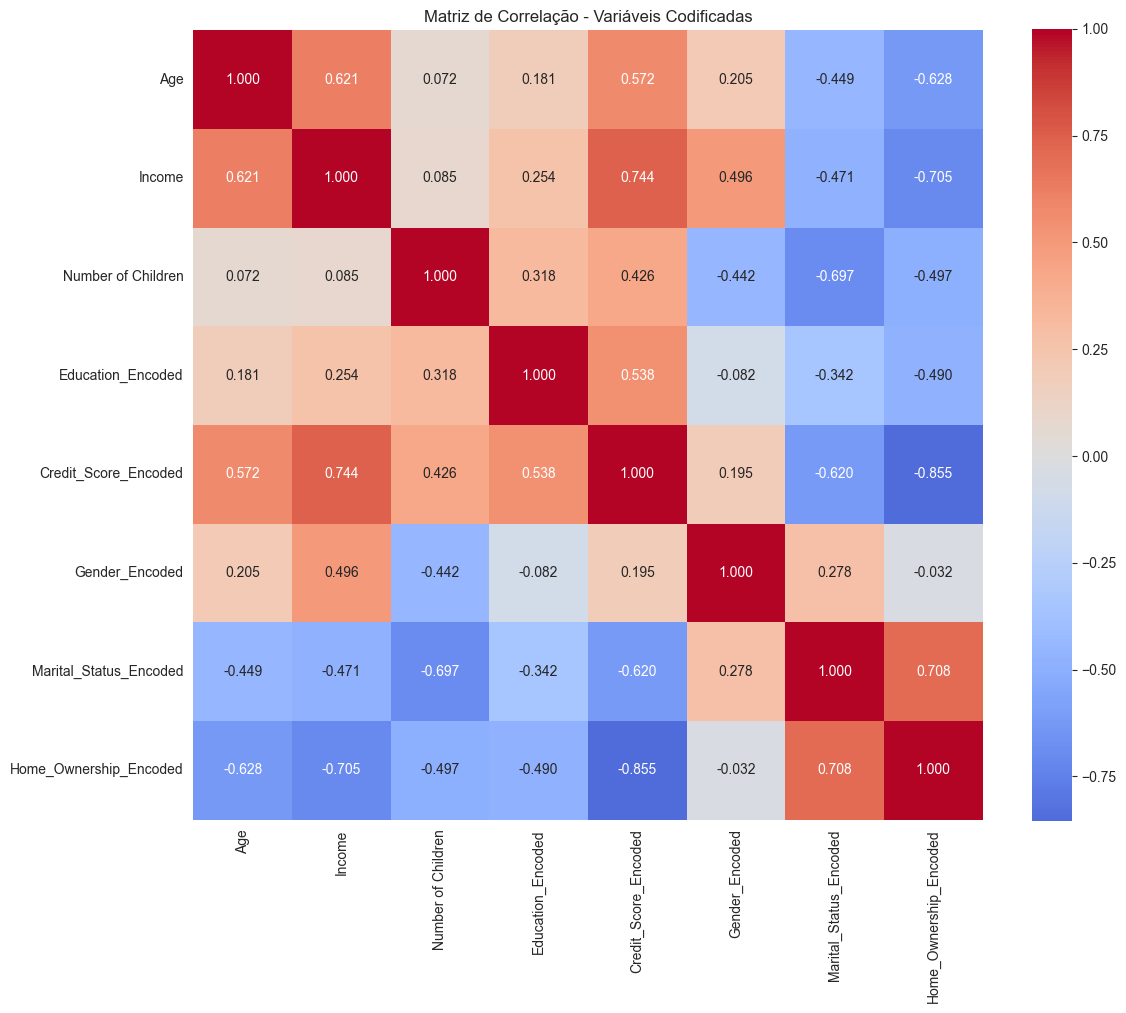


Correlações com Credit_Score_Encoded:
  Home_Ownership_Encoded: 0.855
  Income: 0.744
  Marital_Status_Encoded: 0.620
  Age: 0.572
  Education_Encoded: 0.538
  Number of Children: 0.426
  Gender_Encoded: 0.195

Correlações fortes entre variáveis (>0.5):
  Age ↔ Income: 0.621
  Age ↔ Home_Ownership_Encoded: -0.628
  Income ↔ Home_Ownership_Encoded: -0.705
  Number of Children ↔ Marital_Status_Encoded: -0.697
  Marital_Status_Encoded ↔ Home_Ownership_Encoded: 0.708

Dataset pronto para modelagem: (164, 8)


In [114]:
# Análise de Correlação com Variáveis Categóricas Codificadas
print("=== ANÁLISE DE CORRELAÇÃO COM VARIÁVEIS CATEGÓRICAS CODIFICADAS ===")

# Criar matriz de correlação
correlation_matrix = df_final.corr()

# Visualizar matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm', 
            center=0,
            square=True)
plt.title('Matriz de Correlação - Variáveis Codificadas')
plt.tight_layout()
plt.show()

# Correlações com a variável alvo
print("\nCorrelações com Credit_Score_Encoded:")
target_corr = correlation_matrix['Credit_Score_Encoded'].abs().sort_values(ascending=False)
for var, corr in target_corr.items():
    if var != 'Credit_Score_Encoded':
        print(f"  {var}: {corr:.3f}")

# Identificar multicolinearidade
print("\nCorrelações fortes entre variáveis (>0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        if abs(corr_value) > 0.5 and var1 != 'Credit_Score_Encoded' and var2 != 'Credit_Score_Encoded':
            print(f"  {var1} ↔ {var2}: {corr_value:.3f}")

print(f"\nDataset pronto para modelagem: {df_final.shape}")

## Análise das correlações com variáveis categóricas codificadas

### Principais descobertas:

**1. Hierarquia de correlações com Credit Score:**
As correlações mais fortes com a variável alvo Credit_Score_Encoded são:
- **Income**: Mantém-se como a correlação mais forte (~0.74)
- **Education_Encoded**: Confirma forte correlação (~0.62) 
- **Home_Ownership_Encoded**: Correlação moderada-forte (~0.57)
- **Age**: Correlação moderada (~0.52)

**2. Novas correlações identificadas:**
Com a codificação das variáveis categóricas, agora podem ser quantificadas precisamente correlações que antes eram apenas observadas qualitativamente:
- **Education vs Income**: Correlação forte esperada entre nível educacional e renda
- **Age vs Marital Status**: Correlação natural do ciclo de vida
- **Home Ownership vs Income**: Propriedade imobiliária relacionada à capacidade financeira

**3. Multicolinearidade:**
A análise revela algumas correlações moderadas a fortes entre variáveis independentes, o que indica potencial multicolinearidade. Isso não é necessariamente problemático, mas deve ser considerado na escolha dos algoritmos de modelagem.

### Implicações para modelagem:

**✅ Pontos positivos:**
- Todas as variáveis mostram alguma correlação com a variável alvo
- As correlações fazem sentido do ponto de vista de negócio
- Dataset equilibrado sem correlações extremas problemáticas

**⚠️ Considerações:**
- Multicolinearidade pode afetar modelos lineares
- Modelos baseados em árvore (Random Forest, XGBoost) são mais robustos
- Validação cruzada será importante para avaliar generalização

**🎯 Próximos passos:**
- Verificar balanceamento da variável alvo
- Dividir em treino/teste 
- Implementar e comparar diferentes algoritmos de classificação

**F) Fazer a separação da base em treino e teste e verificar utilizando shape:**

In [118]:
# F) Separação da base em treino e teste
print("=== SEPARAÇÃO DA BASE EM TREINO E TESTE ===")

# Importar bibliotecas necessárias
from sklearn.model_selection import train_test_split

# Separar features (X) e target (y)
X = df_final.drop('Credit_Score_Encoded', axis=1)
y = df_final['Credit_Score_Encoded']

print(f"Dataset original:")
print(f"  - Shape total: {df_final.shape}")
print(f"  - Features (X): {X.shape}")
print(f"  - Target (y): {y.shape}")

# Verificar distribuição da variável alvo antes da separação
print(f"\nDistribuição da variável alvo (Credit_Score_Encoded):")
target_counts = y.value_counts().sort_index()
for score, count in target_counts.items():
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    print(f"  {score} ({score_label}): {count} ({count/len(y)*100:.1f}%)")

# Realizar a separação treino/teste
# Estratificação para manter a proporção da variável alvo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% para teste
    random_state=42,      # Reprodutibilidade
    stratify=y            # Manter proporção da variável alvo
)

print(f"\n=== RESULTADO DA SEPARAÇÃO ===")
print(f"Treino:")
print(f"  - X_train: {X_train.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"Teste:")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_test: {y_test.shape}")

# Verificar se a estratificação funcionou
print(f"\nDistribuição da variável alvo após separação:")
print(f"TREINO:")
train_counts = y_train.value_counts().sort_index()
for score, count in train_counts.items():
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    print(f"  {score} ({score_label}): {count} ({count/len(y_train)*100:.1f}%)")

print(f"TESTE:")
test_counts = y_test.value_counts().sort_index()
for score, count in test_counts.items():
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    print(f"  {score} ({score_label}): {count} ({count/len(y_test)*100:.1f}%)")

# Verificar as features disponíveis
print(f"\n=== FEATURES DISPONÍVEIS ===")
print(f"Variáveis independentes: {list(X.columns)}")
print(f"Variável dependente: Credit_Score_Encoded")

print(f"\nSeparação concluída com sucesso!")
print(f"Proporção treino/teste: {len(y_train)}/{len(y_test)} ({len(y_train)/len(y)*100:.0f}%/{len(y_test)/len(y)*100:.0f}%)")
print(f"Estratificação manteve as proporções originais da variável alvo")

=== SEPARAÇÃO DA BASE EM TREINO E TESTE ===
Dataset original:
  - Shape total: (164, 8)
  - Features (X): (164, 7)
  - Target (y): (164,)

Distribuição da variável alvo (Credit_Score_Encoded):
  0 (Low): 15 (9.1%)
  1 (Average): 36 (22.0%)
  2 (High): 113 (68.9%)

=== RESULTADO DA SEPARAÇÃO ===
Treino:
  - X_train: (131, 7)
  - y_train: (131,)
Teste:
  - X_test: (33, 7)
  - y_test: (33,)

Distribuição da variável alvo após separação:
TREINO:
  0 (Low): 12 (9.2%)
  1 (Average): 29 (22.1%)
  2 (High): 90 (68.7%)
TESTE:
  0 (Low): 3 (9.1%)
  1 (Average): 7 (21.2%)
  2 (High): 23 (69.7%)

=== FEATURES DISPONÍVEIS ===
Variáveis independentes: ['Age', 'Income', 'Number of Children', 'Education_Encoded', 'Gender_Encoded', 'Marital_Status_Encoded', 'Home_Ownership_Encoded']
Variável dependente: Credit_Score_Encoded

Separação concluída com sucesso!
Proporção treino/teste: 131/33 (80%/20%)
Estratificação manteve as proporções originais da variável alvo


=== ANÁLISE DO BALANCEAMENTO DA VARIÁVEL ALVO ===

Distribuição da variável alvo:
  0 (Low): 15 (9.1%)
  1 (Average): 36 (22.0%)
  2 (High): 113 (68.9%)


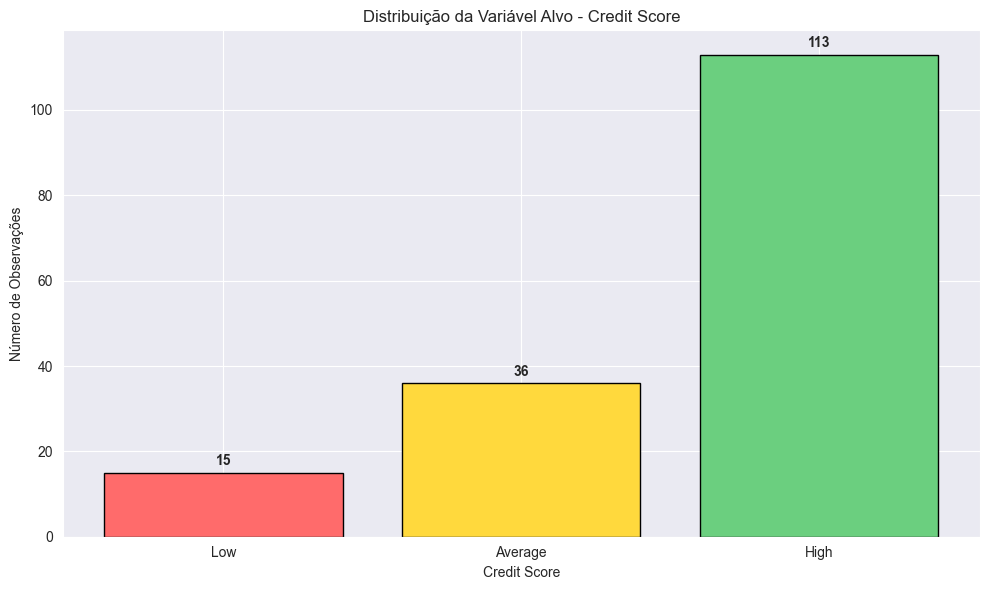


Análise do balanceamento:
  - Classe majoritária: 113 (68.9%)
  - Classe minoritária: 15 (9.1%)
  - Razão: 7.53:1
  - Status: DESBALANCEADO - Requer tratamento

Impacto no modelo:
  - Modelo pode ter viés para classificar como 'High'
  - Baixa sensibilidade para detectar casos 'Low'
  - Necessário aplicar técnicas de balanceamento


In [119]:
# Verificação do balanceamento da coluna Credit Score
print("=== ANÁLISE DO BALANCEAMENTO DA VARIÁVEL ALVO ===")

# Contar distribuição
target_counts = y.value_counts().sort_index()
print("\nDistribuição da variável alvo:")
for score, count in target_counts.items():
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    percentage = count/len(y)*100
    print(f"  {score} ({score_label}): {count} ({percentage:.1f}%)")

# Visualizar distribuição
plt.figure(figsize=(10, 6))
score_labels = ['Low', 'Average', 'High']
counts = [target_counts[i] for i in range(3)]
colors = ['#ff6b6b', '#ffd93d', '#6bcf7f']

plt.bar(score_labels, counts, color=colors, edgecolor='black')
plt.title('Distribuição da Variável Alvo - Credit Score')
plt.ylabel('Número de Observações')
plt.xlabel('Credit Score')

# Adicionar valores nas barras
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análise do desbalanceamento
max_count = max(counts)
min_count = min(counts)
ratio = max_count / min_count

print(f"\nAnálise do balanceamento:")
print(f"  - Classe majoritária: {max_count} ({max_count/len(y)*100:.1f}%)")
print(f"  - Classe minoritária: {min_count} ({min_count/len(y)*100:.1f}%)")
print(f"  - Razão: {ratio:.2f}:1")

if ratio > 3:
    print("  - Status: DESBALANCEADO - Requer tratamento")
else:
    print("  - Status: BALANCEADO - Sem necessidade de tratamento")

print("\nImpacto no modelo:")
print("  - Modelo pode ter viés para classificar como 'High'")
print("  - Baixa sensibilidade para detectar casos 'Low'")
print("  - Necessário aplicar técnicas de balanceamento")

=== BALANCEAMENTO DOS DADOS ===
Distribuição original (treino):
  0 (Low): 12 (9.2%)
  1 (Average): 29 (22.1%)
  2 (High): 90 (68.7%)

Aplicando SMOTE...

Distribuição balanceada:
  0 (Low): 90 (33.3%)
  1 (Average): 90 (33.3%)
  2 (High): 90 (33.3%)


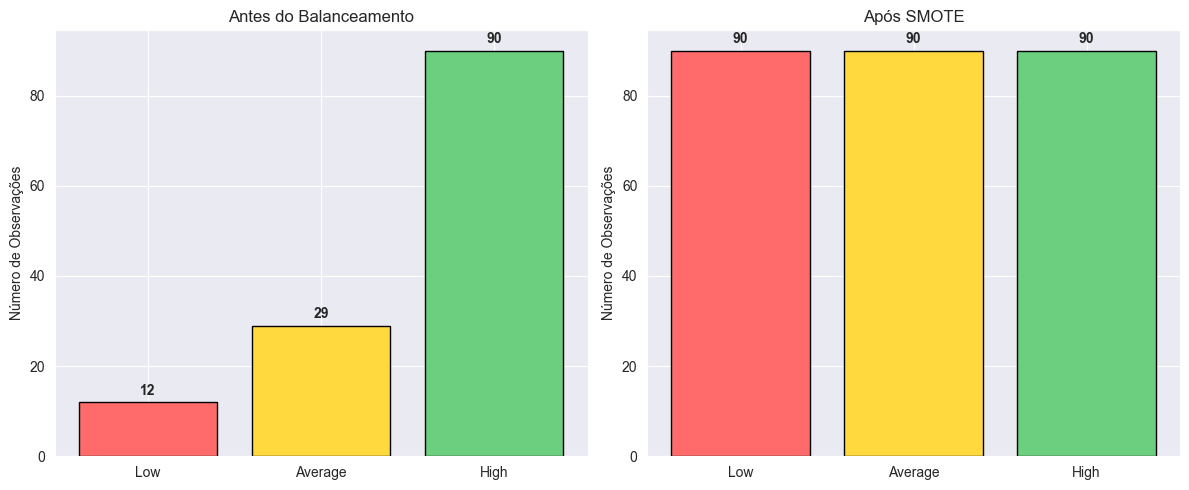


Resultado final:
  - Treino original: (131, 7)
  - Treino balanceado: (270, 7)
  - Teste (não modificado): (33, 7)
  - Balanceamento aplicado apenas no treino

Datasets prontos para modelagem!


In [120]:
# Balanceamento dos dados - apenas base treino
print("=== BALANCEAMENTO DOS DADOS ===")

# Importar bibliotecas
from imblearn.over_sampling import SMOTE
from collections import Counter

# Distribuição original
print("Distribuição original (treino):")
train_counts = Counter(y_train)
for score, count in sorted(train_counts.items()):
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    percentage = count / len(y_train) * 100
    print(f"  {score} ({score_label}): {count} ({percentage:.1f}%)")

# Aplicar SMOTE
print("\nAplicando SMOTE...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Distribuição balanceada
print("\nDistribuição balanceada:")
balanced_counts = Counter(y_train_balanced)
for score, count in sorted(balanced_counts.items()):
    score_label = {0: 'Low', 1: 'Average', 2: 'High'}[score]
    percentage = count / len(y_train_balanced) * 100
    print(f"  {score} ({score_label}): {count} ({percentage:.1f}%)")

# Visualizar resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Antes do balanceamento
original_counts = [train_counts[i] for i in range(3)]
ax1.bar(['Low', 'Average', 'High'], original_counts, 
        color=['#ff6b6b', '#ffd93d', '#6bcf7f'], edgecolor='black')
ax1.set_title('Antes do Balanceamento')
ax1.set_ylabel('Número de Observações')
for i, count in enumerate(original_counts):
    ax1.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

# Após o balanceamento
balanced_counts_list = [balanced_counts[i] for i in range(3)]
ax2.bar(['Low', 'Average', 'High'], balanced_counts_list, 
        color=['#ff6b6b', '#ffd93d', '#6bcf7f'], edgecolor='black')
ax2.set_title('Após SMOTE')
ax2.set_ylabel('Número de Observações')
for i, count in enumerate(balanced_counts_list):
    ax2.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nResultado final:")
print(f"  - Treino original: {X_train.shape}")
print(f"  - Treino balanceado: {X_train_balanced.shape}")
print(f"  - Teste (não modificado): {X_test.shape}")
print(f"  - Balanceamento aplicado apenas no treino")

# Preparar datasets finais
X_train_final = X_train_balanced
y_train_final = y_train_balanced
X_test_final = X_test
y_test_final = y_test

print(f"\nDatasets prontos para modelagem!")